In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
sns.set_style('dark')
%matplotlib inline

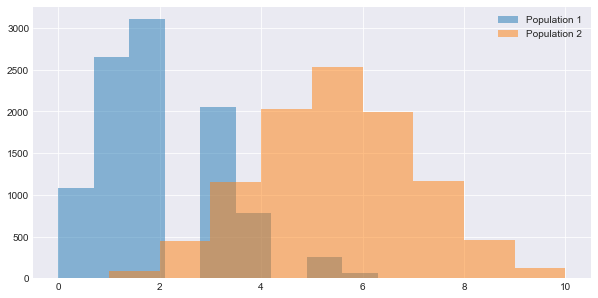

In [2]:
def graph_hist(population1, population2, histname1, histname2):
    plt.figure(figsize=(10, 5))
    plt.hist(population1, alpha=0.5, label=histname1) 
    plt.hist(population2, alpha=0.5, label=histname2) 
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
    
def graph_one_hist(population1, histname1):
    plt.figure(figsize=(10, 5))
    plt.hist(population1, alpha=0.5, label=histname1)  
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

n = 10
size = 10000
p1 = 0.2
p2 = 0.5
sample_size = 100

pop1 = np.random.binomial(n, p1, size)
pop2 = np.random.binomial(n, p2, size)

pop1_name = "Population 1"
pop2_name = "Population 2"
graph_hist(pop1, pop2, pop1_name, pop2_name)

Just as in the examples from the prior training section, we see the populations are not normal.  Though population 2 appears to be more normally distributed than population 1.  Now, we proceed with taking a smaller sample of 100 from each population and calculating the (a) mean and (b) standard deviations.

In [3]:
def mean_std(sample_pop):
    return sample_pop.mean(), sample_pop.std()

def create_sample(population, sample_size):
    return np.random.choice(population, sample_size, replace=True)

sample = 100
sample1 = create_sample(pop1, sample)
sample2 = create_sample(pop1, sample)
sample1_mean, sample1_std = mean_std(sample1)
sample2_mean, sample2_std = mean_std(sample2)

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #1', sample1_mean, sample1_std))

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #2', sample2_mean, sample2_std))

For Sample #1, the mean and standard deviation are 1.97 and 1.2037856952132304, respectively.
For Sample #2, the mean and standard deviation are 2.03 and 1.3300751858447704, respectively.


Looking at histograms of the samples should provide some insights into how the samples may differ from the full populations.  So, we will graph the samples as we did the populations.

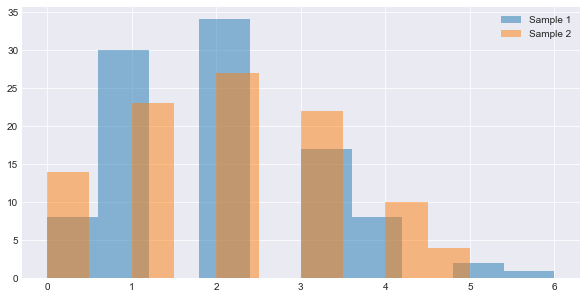

In [4]:
sample1_name = "Sample 1"
sample2_name = "Sample 2"
graph_hist(sample1, sample2, sample1_name, sample2_name)

Interestingly, this histogram of the samples suggests the two populations are more similar - have more overlap - than the one created using the full population data.  At this point, my guess is an increase in sample size brings the sample statistics closer to that of the population while the inverse is also true. 

__ #1: Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?__

*Expectation:*

As sample sizes decrease, I expect our results to be less representative of the actual population.  Thus, I expect variance to increase making any analysis less reliable.

In [5]:
sample = 1000
sample1a = create_sample(pop1, sample)
sample2a = create_sample(pop1, sample)
sample1_meana, sample1_stda = mean_std(sample1a)
sample2_meana, sample2_stda = mean_std(sample2a)

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #1', sample1_meana, sample1_stda))

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #2', sample2_meana, sample2_stda))

For Sample #1, the mean and standard deviation are 2.03 and 1.2965724044572289, respectively.
For Sample #2, the mean and standard deviation are 1.989 and 1.3125848543998975, respectively.


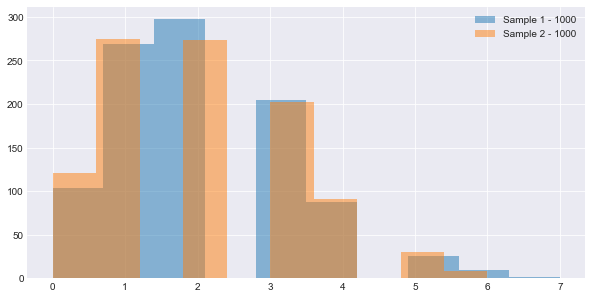

In [6]:
sample1_namea = "Sample 1 - 1000"
sample2_namea = "Sample 2 - 1000"
graph_hist(sample1a, sample2a, sample1_namea, sample2_namea)

In [7]:
sample = 20
sample1b = create_sample(pop1, sample)
sample2b = create_sample(pop1, sample)
sample1_meanb, sample1_stdb = mean_std(sample1b)
sample2_meanb, sample2_stdb = mean_std(sample2b)

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #1', sample1_meanb, sample1_stdb))

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #2', sample2_meanb, sample2_stdb))

For Sample #1, the mean and standard deviation are 2.1 and 1.1357816691600549, respectively.
For Sample #2, the mean and standard deviation are 1.95 and 1.4309088021254184, respectively.


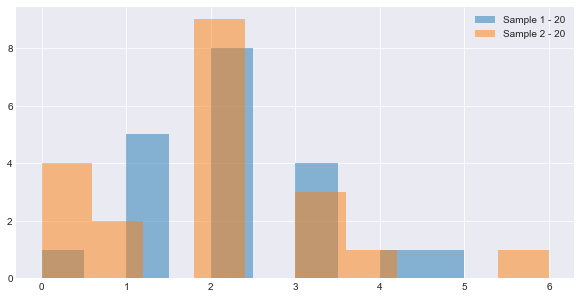

In [8]:
sample1_nameb = "Sample 1 - 20"
sample2_nameb = "Sample 2 - 20"
graph_hist(sample1b, sample2b, sample1_nameb, sample2_nameb)

In [9]:
print(sample1_meana - sample1_meanb)
print(sample2_meana - sample2_meanb)

-0.07000000000000028
0.039000000000000146


In [10]:
print(sample1_stda - sample1_stdb)
print(sample2_stda - sample2_stdb)

0.16079073529717403
-0.1183239477255209


The means increase as we decrease the sample size.  While for sample 1 the standard deviation decreases with the smaller sample size, it increases for sample 2.

__ #2: Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?__

*Expectation:*

I suspect that as the probability value approaches 50% the variance due to noise will increase.  Thus, the t-value will increase and p-value will also increase.

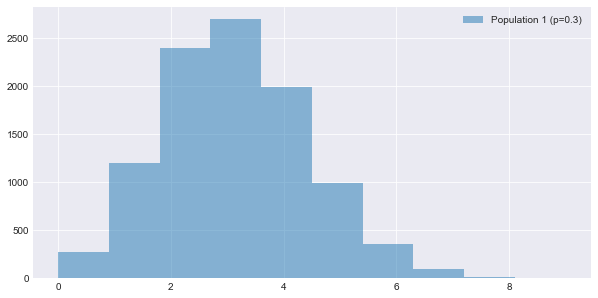

In [11]:
n = 10
size = 10000
p1 = 0.3

pop1a = np.random.binomial(n, p1, size)

pop1_name_a = "Population 1 (p=0.3)"
graph_one_hist(pop1a, pop1_name_a)

In [12]:
# create new samples
sample = 100
sample1a = create_sample(pop1a, sample)
sample2a = create_sample(pop1a, sample)
sample1_meana, sample1_stda = mean_std(sample1a)
sample2_meana, sample2_stda = mean_std(sample2a)

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #1', sample1_meana, sample1_stda))

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #2', sample2_meana, sample2_stda))

# calculate t-value and p-value
print(ttest_ind(sample2a, sample1a, equal_var=False))

For Sample #1, the mean and standard deviation are 2.8 and 1.5556349186104046, respectively.
For Sample #2, the mean and standard deviation are 3.1 and 1.4106735979665885, respectively.
Ttest_indResult(statistic=1.4214106244380296, pvalue=0.15678547164413714)


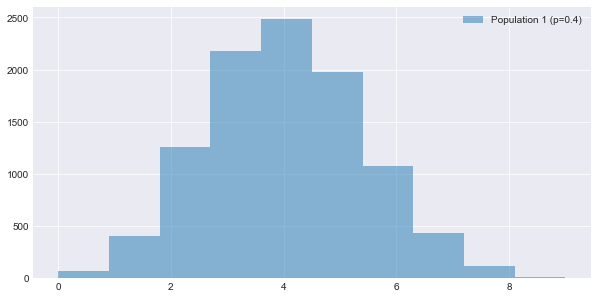

In [13]:
n = 10
size = 10000
p1 = 0.4

pop1b = np.random.binomial(n, p1, size)

pop1_name_b = "Population 1 (p=0.4)"
graph_one_hist(pop1b, pop1_name_b)

In [14]:
# create new samples
sample = 100
sample1b = create_sample(pop1b, sample)
sample2b = create_sample(pop1b, sample)
sample1_meanb, sample1_stdb = mean_std(sample1b)
sample2_meanb, sample2_stdb = mean_std(sample2b)

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #1', sample1_meanb, sample1_stdb))

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Sample #2', sample2_meanb, sample2_stdb))

# calculate t-value and p-value
print(ttest_ind(sample2b, sample1b, equal_var=False))

For Sample #1, the mean and standard deviation are 4.04 and 1.3994284547628721, respectively.
For Sample #2, the mean and standard deviation are 4.03 and 1.621449968392488, respectively.
Ttest_indResult(statistic=-0.04645468918353532, pvalue=0.9629956684485175)


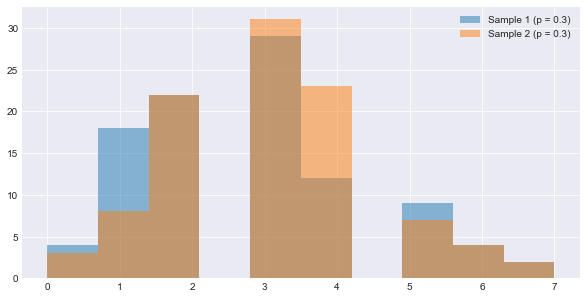

In [16]:
graph_hist(sample1a, sample2a, "Sample 1 (p = 0.3)", "Sample 2 (p = 0.3)")

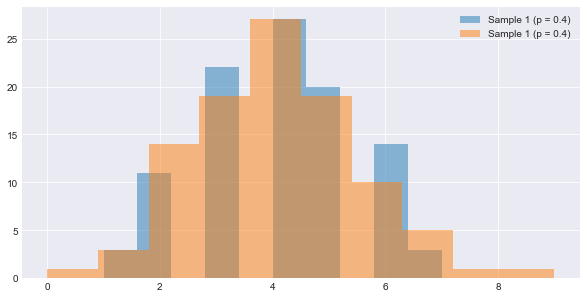

In [17]:
graph_hist(sample1b, sample2b, "Sample 1 (p = 0.4)", "Sample 1 (p = 0.4)")

My initial assumptions were incorrect for the t-value but appear more accurate for p-value.

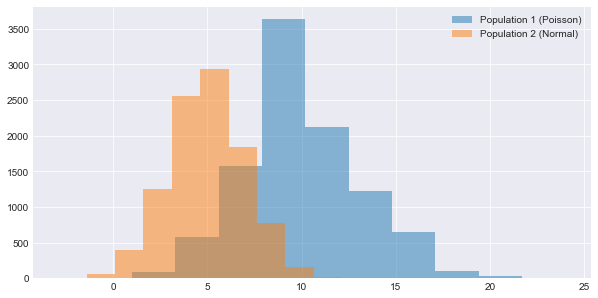

In [18]:
n = 10
size = 10000

pop1 = np.random.poisson(n, size)
pop2 = np.random.normal(5, 2, size)

pop1_name = "Population 1 (Poisson)"
pop2_name = "Population 2 (Normal)"
graph_hist(pop1, pop2, pop1_name, pop2_name)

In [23]:
pop1_mean, pop1_std = mean_std(pop1)
pop2_mean, pop2_std = mean_std(pop2)

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Poplulation #1', pop1_mean, pop1_std))

print('For {}, the mean and standard deviation are {} and {}, respectively.'.\
      format('Population #2', pop2_mean, pop2_std))

For Poplulation #1, the mean and standard deviation are 9.9635 and 3.1309371999450906, respectively.
For Population #2, the mean and standard deviation are 4.9853888839135685 and 1.986854751970656, respectively.


In [27]:
sample = 100
sample1a = create_sample(pop1, sample)
sample2a = create_sample(pop1, sample)
sample1b = create_sample(pop1, sample)
sample2b = create_sample(pop1, sample)

# calculate t-value and p-value
print(ttest_ind(sample2a, sample1a, equal_var=False))

# calculate t-value and p-value
print(ttest_ind(sample2b, sample1b, equal_var=False))

Ttest_indResult(statistic=0.20825374766382232, pvalue=0.8352465803593887)
Ttest_indResult(statistic=-0.08862514106896581, pvalue=0.9294702781582082)


According to the t-values, sample means for both Poisson and Normal (as expected) distributions appear to reflect the population values.